<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/GSE78958'
os.chdir(proj_dir)

Mounted at /content/drive


In [48]:
# Set basic info
trait = "Depression"
condition = 'Obesity'

In [49]:
!pip install sparse_lmm

In [50]:
geo_root = '/content/drive/MyDrive/AI4Science/GSE78958'

In [51]:
import gzip
import pandas as pd
import os
import io


# Process the clinical data to get the mapping between gene names and gene probes.
condition_clinical_data_path = os.path.join(geo_root, 'GSE78958_family.soft.gz')

with gzip.open(condition_clinical_data_path, 'rt') as f:
    contents = f.read()
# Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
condition_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
# map_data['Gene Symbol']  # Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
# map_data['ID']  # Gene probes that exit both in gene data and map data
condition_map_data = condition_map_data.loc[:,['ID','Gene Symbol']]
condition_map_data = condition_map_data.dropna()
condition_map_data

Map data:


,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
22232,AFFX-HUMGAPDH/M33197_M_at,GAPDH
22233,AFFX-HUMISGF3A/M97935_3_at,STAT1
22234,AFFX-HUMISGF3A/M97935_5_at,STAT1
22235,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [52]:
# Read gene data
condition_gene_data_path = os.path.join(geo_root, 'GSE78958_series_matrix.txt.gz')
condition_gene_data = pd.read_csv(condition_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("Gene Data:")
condition_gene_data = condition_gene_data.dropna()
condition_gene_data

Gene Data:


,ID_REF,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
0,1007_s_at,11.28850,11.03150,11.16710,10.99510,10.59830,10.66480,10.46060,10.86280,10.67120,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
1,1053_at,7.63904,7.26402,7.68085,6.69447,7.03229,7.67410,7.13190,7.17344,7.72702,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
2,117_at,8.04600,6.95939,7.66881,7.20154,7.44421,6.81892,7.69349,7.17604,7.43512,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
3,121_at,8.40344,8.10701,7.64901,7.61717,7.88172,7.42525,8.52529,8.85369,7.66742,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
4,1255_g_at,3.25795,3.23091,3.15074,3.80748,3.35172,3.32401,3.40824,3.53437,3.24152,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22272,AFFX-ThrX-5_at,3.88166,3.80152,3.66039,3.35783,3.70256,3.83488,3.67033,4.05419,3.32463,...,4.13470,4.15608,4.21411,4.09967,3.87734,3.94543,3.82307,4.03133,3.99748,4.12102
22273,AFFX-ThrX-M_at,3.91730,3.47960,2.86268,2.99534,3.04051,3.56954,3.59695,3.38818,3.07477,...,3.59862,3.50953,3.78166,3.48145,3.99519,4.08996,4.10022,6.06674,3.49158,3.50046
22274,AFFX-TrpnX-3_at,3.16477,3.17312,2.99680,2.97375,3.20824,3.05029,3.05519,3.09737,2.88569,...,3.33134,3.07075,3.28115,3.29891,3.00888,2.94178,2.97901,3.08126,3.14365,3.18247
22275,AFFX-TrpnX-5_at,3.75914,3.69434,3.79928,3.88686,3.91584,3.82882,4.11923,4.05000,3.68115,...,3.90579,3.98690,4.11565,4.22331,3.89235,3.84259,3.83147,3.79138,3.98642,3.93776


In [53]:
# Merge two datasets
condition_gene_data = pd.merge(condition_map_data.rename(columns={'ID':'ID_REF'}), condition_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
condition_gene_data.rename(str.lower, axis='index', inplace=True)
condition_gene_data

,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,11.28850,11.03150,11.16710,10.99510,10.59830,10.66480,10.46060,10.86280,10.67120,10.97620,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
rfc2,7.63904,7.26402,7.68085,6.69447,7.03229,7.67410,7.13190,7.17344,7.72702,6.81676,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
hspa6,8.04600,6.95939,7.66881,7.20154,7.44421,6.81892,7.69349,7.17604,7.43512,8.23233,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
pax8,8.40344,8.10701,7.64901,7.61717,7.88172,7.42525,8.52529,8.85369,7.66742,8.91888,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
guca1a,3.25795,3.23091,3.15074,3.80748,3.35172,3.32401,3.40824,3.53437,3.24152,3.47329,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.65790,13.14960,11.71850,12.80670,12.77510,13.00240,11.84720,12.28220,13.50270,12.96300,...,13.39520,13.01440,12.57790,13.40130,13.73630,13.80570,13.98530,14.18820,13.18030,13.33330
stat1,10.41710,12.25150,10.37870,10.56050,11.34770,11.99420,9.99272,9.95901,12.43690,9.67842,...,9.90338,9.28871,9.31771,11.09760,10.70810,10.02190,11.34610,9.85467,11.89580,9.32593
stat1,3.46671,4.04243,3.25552,3.47548,3.52812,3.92416,3.23998,3.45656,3.76377,3.46457,...,3.40408,3.30393,3.34305,3.41187,3.66566,3.25408,3.77408,3.25113,4.22393,3.34183


In [54]:
# Read map data between genes and gene probes.

trait_clinical_data_path = os.path.join(geo_root, 'GSE38311/GSE38311_family.soft.gz')

with gzip.open(trait_clinical_data_path, 'rt') as f:
    contents = f.read()
#Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
trait_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
#map_data_trait['GENE_SYMBOL']#Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
#map_data_trait['ID']#Gene probes that exit both in gene data and map data
trait_map_data = trait_map_data.loc[:,['ID','Gene Symbol']]
trait_map_data = trait_map_data.dropna()
trait_map_data

Map data:


,ID,Gene Symbol
0,1415670_at,Copg1
1,1415671_at,Atp6v0d1
2,1415672_at,Golga7
3,1415673_at,Psph
4,1415674_a_at,Trappc4
...,...,...
22658,AFFX-PyruCarbMur/L09192_MA_at,Pcx
22659,AFFX-PyruCarbMur/L09192_MB_at,Pcx
22684,AFFX-TransRecMur/X57349_3_at,Tfrc
22685,AFFX-TransRecMur/X57349_5_at,Tfrc


In [55]:
# Read gene data
trait_gene_data_path = os.path.join(geo_root, 'GSE38311/GSE38311_series_matrix.txt.gz')

trait_gene_data = pd.read_csv(trait_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("\nGene Data:")
trait_gene_data = trait_gene_data.dropna()
trait_gene_data


Gene Data:


,ID_REF,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
0,1415670_at,418.5,317.8,679.0,622.3,626.8
1,1415671_at,335.6,446.4,616.6,806.0,680.8
2,1415672_at,382.8,221.4,362.5,311.4,460.6
3,1415673_at,66.7,40.4,52.2,49.1,66.9
4,1415674_a_at,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...,...
22685,AFFX-TransRecMur/X57349_5_at,81.4,62.5,62.4,110.9,88.1
22686,AFFX-TransRecMur/X57349_M_at,10.6,9.7,24.8,54.2,50.3
22687,AFFX-TrpnX-3_at,4.1,0.3,0.7,1.9,0.8
22688,AFFX-TrpnX-5_at,3.6,4.1,6.4,4.0,4.1


In [56]:

trait_gene_data = pd.merge(trait_map_data.rename(columns={'ID':'ID_REF'}), trait_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
trait_gene_data.rename(str.lower, axis='index', inplace=True)
trait_gene_data


,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Gene Symbol,,,,,
copg1,418.5,317.8,679.0,622.3,626.8
atp6v0d1,335.6,446.4,616.6,806.0,680.8
golga7,382.8,221.4,362.5,311.4,460.6
psph,66.7,40.4,52.2,49.1,66.9
trappc4,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...
pcx,2.9,17.9,2.1,12.4,8.0
pcx,5.6,2.7,1.0,2.5,3.3
tfrc,22.0,29.3,30.5,53.8,49.7


In [57]:

genes_in_trait_data = trait_gene_data.index.tolist()
genes_in_condition_data = condition_gene_data.index.tolist()
def find_common_genes(list1, list2):
    common_elements = []
    for element1 in list1:
        if element1 in list2:
            common_elements.append(element1)
    return common_elements

common_genes = find_common_genes(genes_in_trait_data, genes_in_condition_data)
if len(common_genes):
    print(f"Both gene data have {len(common_genes)} identical genes:", common_genes)
else:
    print("No the same genes. Please find the other gene data for condition or trait!")
    # break



Both gene data have 15277 identical genes: ['copg1', 'atp6v0d1', 'golga7', 'psph', 'dpm2', 'psmb5', 'dhrs1', 'ppm1a', 'psenen', 'xpo7', 'nmt1', 'atg5', 'mtif2', 'rab14', 'psap', 'ube2g1', 'zkscan3', 'dlg1', 'canx', 'derl1', 'wars', 'psma1', 'sar1a', 'g3bp2', 'golm1', 'gps1', 'ssr3', 'ctbp1', 'huwe1', 'cdv3', 'smim7', 'copa', 'anapc2', 'tug1', 'gbf1', 'arfgef1', 'ddx24', 'snrnp27', 'rnf220', 'sap30l', 'armc1', 'mad2l1bp', 'naa60', 'eif5', 'cdc42', 'rrn3', 'ankrd17', 'pabpn1', 'pdpk1', 'cpsf7', 'angel2', 'ddb1', 'pfdn5', 'rfk', 'rbm42', 'psmc5', 'tmem165', 'aup1', 'hdac5', 'dscr3', 'cic', 'riok3', 'dctn5', 'rragc', 'tbl3', 'hp1bp3', 'abhd17a', 'polr2f', 'gbf1', 'fryl', 'lamtor5', 'atox1', 'mrpl52', 'mrpl52', 'hnrnpul2', 'sec22b', 'ythdf1', 'itch', 'wdr6', 'ncl', 'ncl', 'ncl', 'rbbp7', 'aldh3a2', 'pnliprp1', 'morf4l2', 'armcx2', 'vps35', 'vps35', 'cct8', 'pgc', 'ganab', 'rnf34', 'rbck1', 'pnpo', 'spin1', 'spin1', 'wbp11', 'gja1', 'gja1', 'slc16a1', 'cx3cl1', 'cx3cl1', 'clps', 'plat', 'gsn

In [64]:
# Find the genes related to the trait according to biomedical knowledge from OMIM

corresponding_gene_symbol_path = os.path.join(os.path.dirname(geo_root), 'GSE78958/Summary_Corresponding_Gene_Symbol.csv')
corresponding_gene = pd.read_csv(corresponding_gene_symbol_path)
corresponding_gene = corresponding_gene.loc[:,['Trait name','Corresponding_Gene_Symbol']].set_index('Trait name')
# Convert to lower case
corresponding_gene = corresponding_gene.apply(lambda x: x.astype(str).str.lower())
corresponding_gene.index = corresponding_gene.index.str.lower()
corresponding_gene

,Corresponding_Gene_Symbol
Trait name,
breast cancer,"brca2, cdh1, ppm1d, pik3ca, kras, akt1, tp53, ..."
cystic fibrosis,"cftr, fcgr2a, tgfb1, kif21a, cdc73, crb2, rnaset2"
obesity,"lep, pparg, pomc, mc4r, enpp1, adcy3"
sickle cell anemia,"hbb, trnt1, gata1, fancb, fanca, fancf, fancc,..."
huntington's disease,"prnp, jph3, htt, gba1, mpz, psen1, apoe, gdap1..."
...,...
metabolic rate,"adrb1, mmp1, rnf212, dyrk1b, cela2a, slc25a42,..."
von willebrand disease,"vwf, gp1ba, vwa5a, vwa7, vwce, vwc2, svep1, vw..."
werner syndrome,"wrn, wrnip1, fgfr2, fbn1, mecp2, flna, tp63, t..."


In [65]:
corresponding_gene_for_trait = corresponding_gene.loc[trait.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_trait = [gn.strip() for gn in corresponding_gene_for_trait]
print("Corresponding genes for trait", corresponding_gene_for_trait)
corresponding_gene_for_condition = corresponding_gene.loc[condition.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_condition = [gn.strip() for gn in corresponding_gene_for_condition]
print("Corresponding genes for condition", corresponding_gene_for_condition)

gene_regressors_for_condition = find_common_genes(corresponding_gene_for_condition, common_genes)
if len(gene_regressors_for_condition):
    print(f"The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. \n There are(is) {len(gene_regressors_for_condition)} regressors:", gene_regressors_for_condition)
else:
    print("No the same gene regressors. Please find the other gene data for condition or trait!")
    # break


Corresponding genes for trait ['tph2']
Corresponding genes for condition ['lep', 'pparg', 'pomc', 'mc4r', 'enpp1', 'adcy3']
The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. 
 There are(is) 5 regressors: ['lep', 'pparg', 'pomc', 'enpp1', 'adcy3']


In [66]:

#Read clinical information to get the trait. Note that clear undersanding on these information is necessary.
def extract_lines_with_prefix(file_path, prefixes):
    filtered_lines = []
    with gzip.open(file_path, 'rt') as f:
      contents = f.read()
    lines = contents.split('\n')
    for line in lines:
      line = line.strip()
      for prefix in prefixes:
        if line.startswith(prefix):
          filtered_lines.append(line)
          break
    return filtered_lines
trait_file_path = trait_gene_data_path # gene_data_path_trait
trait_prefixes = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefixes)
trait_filtered_content = '\n'.join(trait_filtered_lines)
print(trait_filtered_content + "\n")

!Series_title	"Expression of ventromedial hypothalamus (VMH) from electroconvulsive seizure (ECS) treated C57Bl/6 mice"
!Series_summary	"The ventromedial nucleus of the hypothalamus (VMH) is thought to a satiety center and a potential target for anti-obesity therapy. Electroconvulsive seizure (ECS) therapy is highly effective in psychiatric diseases including depression, but also implicated beneficial effects on other neurological diseases. Although it has been reported that the neurons in the VMH are strongly activated by ECS stimulation, the effect of ECS in this hypothalamic subnucleus remains unknown. To address this issue, we investigated molecular changes in the VMH in response to ECS by utilizing a method of laser-capture microdissection coupled with microarray analysis, and examined behavioral effects of ECS via VMH activation. ECS significantly induced gene expression not only immediate-early genes such as Fos, Fosb and Jun, but also Bdnf, Adcyap1, and Hrh1 in the VMH after a 

In [67]:
#This is an example of manual labeling
trait_prefix = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefix)
trait_filtered_content = '\n'.join(trait_filtered_lines)
trait_clinical_data = pd.read_csv(io.StringIO(trait_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
trait_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
0,!Sample_characteristics_ch1,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6
1,!Sample_characteristics_ch1,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus
2,!Sample_characteristics_ch1,"treatment: no shock, brain collected after 2hrs",treatment: 1 shock and brain collected after 2hrs,treatment: 1 shock and brain collected after 6hrs,treatment: 7 shocks and brain collected after ...,treatment: 7 shocks and brain collected after ...


In [68]:
trait_clinical_data = trait_clinical_data.drop(trait_clinical_data.index[[0, 1]])  # Remove the unrelated first and second rows
trait_clinical_data = trait_clinical_data.drop(columns=[trait_clinical_data.columns[0]])  # Remove the unrelated first column
trait_clinical_data.index = [trait]
trait_clinical_data


,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Depression,"treatment: no shock, brain collected after 2hrs",treatment: 1 shock and brain collected after 2hrs,treatment: 1 shock and brain collected after 6hrs,treatment: 7 shocks and brain collected after ...,treatment: 7 shocks and brain collected after ...


In [69]:
# Label the samples and remove the control group in clinical data
trait_clinical_data = trait_clinical_data.replace("group: animal without seizure", 0)
trait_clinical_data = trait_clinical_data.replace("group: animal with seizure", 1)
control_group_samples_id = trait_clinical_data.columns[trait_clinical_data.eq('group: Control').any()]
trait_clinical_data = trait_clinical_data.drop(columns=control_group_samples_id)
trait_clinical_data

,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Depression,"treatment: no shock, brain collected after 2hrs",treatment: 1 shock and brain collected after 2hrs,treatment: 1 shock and brain collected after 6hrs,treatment: 7 shocks and brain collected after ...,treatment: 7 shocks and brain collected after ...


In [70]:
#Remove the control group in gene data
trait_gene_data = trait_gene_data.drop(columns=control_group_samples_id)
trait_gene_data

,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Gene Symbol,,,,,
copg1,418.5,317.8,679.0,622.3,626.8
atp6v0d1,335.6,446.4,616.6,806.0,680.8
golga7,382.8,221.4,362.5,311.4,460.6
psph,66.7,40.4,52.2,49.1,66.9
trappc4,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...
pcx,2.9,17.9,2.1,12.4,8.0
pcx,5.6,2.7,1.0,2.5,3.3
tfrc,22.0,29.3,30.5,53.8,49.7


In [71]:

#Merge two datasets
trait_merged_data = pd.concat([trait_gene_data, trait_clinical_data]).T
# merged_data_trait
# Check whether column names are duplicated
duplicated_columns = trait_merged_data.columns[trait_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)
# Delete duplicate column names and save only one of the columns
trait_merged_data = trait_merged_data.loc[:, ~trait_merged_data.columns.duplicated()]
trait_merged_data


Duplicate column names: Index(['gbf1', 'mrpl52', 'ncl', 'ncl', 'loc101056240 /// sumo2', 'vps35',
       'ublcp1', 'ublcp1', 'spin1', 'ddr1',
       ...
       'actb', 'gapdh', 'gapdh', 'pcx', 'pcx', 'pcx', 'pcx', 'tfrc', 'tfrc',
       'tfrc'],
      dtype='object', length=8529)


,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,psenen,...,adss,ercc2,acrbp /// ing4,eif2b1,ppl,bod1l,zmiz2,alg3,gapdh,Depression
GSM938860,418.5,335.6,382.8,66.7,188.3,92.7,85.5,113.2,196.7,126.7,...,75.5,10.3,37.3,39.7,3.5,1.4,34.7,16.6,3332.5,"treatment: no shock, brain collected after 2hrs"
GSM938861,317.8,446.4,221.4,40.4,159.3,87.5,90.7,81.4,240.3,289.1,...,75.5,7.7,15.3,62.3,2.6,0.9,56.1,17.5,3066.6,treatment: 1 shock and brain collected after 2hrs
GSM938862,679.0,616.6,362.5,52.2,226.9,111.0,226.8,205.6,436.8,265.7,...,92.9,16.9,23.3,30.3,9.0,6.2,93.6,8.0,4645.4,treatment: 1 shock and brain collected after 6hrs
GSM938863,622.3,806.0,311.4,49.1,148.4,157.2,150.7,203.1,281.4,230.9,...,104.3,19.7,21.6,106.0,16.2,13.6,49.9,20.8,4554.1,treatment: 7 shocks and brain collected after ...
GSM938864,626.8,680.8,460.6,66.9,216.1,100.9,237.9,87.9,488.5,332.2,...,175.3,13.9,22.4,44.5,0.9,3.4,48.8,32.4,4454.0,treatment: 7 shocks and brain collected after ...


In [72]:
#Read clinical information. Note that clear undersanding on these information is necessary.
condition_file_path = condition_gene_data_path
prefixes_condition = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, prefixes_condition)
condition_filtered_content = '\n'.join(condition_filtered_lines)
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.  Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
print(condition_filtered_content + "\n")

!Series_title	"Effect of obesity on molecular characteristics of invasive breast tumors: gene expression analysis of 405 tumors by BMI"
!Series_summary	"Background: Obesity is a risk factor for breast cancer in postmenopausal women and is associated with decreased survival and less favorable clinical characteristics such as greater tumor burden, higher grade, and poor prognosis, regardless of menopausal status. Despite the negative impact of obesity on clinical outcome, molecular mechanisms through which excess adiposity influences breast cancer etiology are not well-defined."
!Series_summary	""
!Series_summary	"Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.  Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define signi

In [73]:
#This is an example of manual labeling
condition_prefixes = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, condition_prefixes)
condition_filtered_content = '\n'.join(condition_filtered_lines)
condition_clinical_data = pd.read_csv(io.StringIO(condition_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
condition_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
0,!Sample_characteristics_ch1,patient ethnicity: European American,patient ethnicity: African American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,...,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: Asian,patient ethnicity: European American
1,!Sample_characteristics_ch1,bmi: 25-29.99,bmi: 30+,bmi: Unk,bmi: 25-29.99,bmi: Unk,bmi: Unk,bmi: <25,bmi: <25,bmi: <25,...,bmi: 25-29.99,bmi: <25,bmi: 25-29.99,bmi: 25-29.99,bmi: 30+,bmi: 25-29.99,bmi: 30+,bmi: 30+,bmi: 30+,bmi: 25-29.99
2,!Sample_characteristics_ch1,tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),...,tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1)
3,!Sample_characteristics_ch1,tumor subtype (via breastprs): Basal Like,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Basal Like,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Basal Like,...,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): HER2 enriched,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): HER2 enriched
4,!Sample_characteristics_ch1,tumor stage: Stage IV,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage IIB,...,tumor stage: Stage IIIA,tumor stage: Stage IIB,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIA,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA


In [74]:
condition_clinical_data = condition_clinical_data.drop(condition_clinical_data.index[[0,2,3,4]])  # Remove the unrelated first and second rows
condition_clinical_data = condition_clinical_data.drop(columns=[condition_clinical_data.columns[0]])  # Remove the unrelated first column
condition_clinical_data.index = [condition]
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.
#Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
condition_clinical_data

,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Obesity,bmi: 25-29.99,bmi: 30+,bmi: Unk,bmi: 25-29.99,bmi: Unk,bmi: Unk,bmi: <25,bmi: <25,bmi: <25,bmi: <25,...,bmi: 25-29.99,bmi: <25,bmi: 25-29.99,bmi: 25-29.99,bmi: 30+,bmi: 25-29.99,bmi: 30+,bmi: 30+,bmi: 30+,bmi: 25-29.99


In [75]:

condition_clinical_data = condition_clinical_data.replace("bmi: 25-29.99", 1)
condition_clinical_data = condition_clinical_data.replace("bmi: 30+", 1)
condition_clinical_data = condition_clinical_data.replace("bmi: <25", 0)
condition_clinical_data = condition_clinical_data.replace("bmi: Unk", "NaN")
condition_clinical_data

,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Obesity,1,1,NaN,1,NaN,NaN,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1


In [76]:

NaN_Samples_id = condition_clinical_data.columns[condition_clinical_data.eq('NaN').any()]
print(NaN_Samples_id)
condition_clinical_data = condition_clinical_data.drop(columns=NaN_Samples_id)
condition_clinical_data

Index(['GSM2082087', 'GSM2082089', 'GSM2082090', 'GSM2082103', 'GSM2082105',
       'GSM2082107', 'GSM2082108', 'GSM2082111', 'GSM2082154', 'GSM2082319',
       'GSM2082322', 'GSM2082326', 'GSM2082366', 'GSM2082389', 'GSM2082391',
       'GSM2082411', 'GSM2082417', 'GSM2082456', 'GSM2082479', 'GSM2082482'],
      dtype='object')


,GSM2082085,GSM2082086,GSM2082088,GSM2082091,GSM2082092,GSM2082093,GSM2082094,GSM2082095,GSM2082096,GSM2082097,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Obesity,1,1,1,0,0,0,0,0,0,1,...,1,0,1,1,1,1,1,1,1,1


In [77]:
#Remove the samples with NaN in gene data
condition_gene_data = condition_gene_data.drop(columns=NaN_Samples_id)
condition_gene_data


,GSM2082085,GSM2082086,GSM2082088,GSM2082091,GSM2082092,GSM2082093,GSM2082094,GSM2082095,GSM2082096,GSM2082097,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,11.28850,11.03150,10.99510,10.46060,10.86280,10.67120,10.97620,10.42580,11.17150,11.27190,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
rfc2,7.63904,7.26402,6.69447,7.13190,7.17344,7.72702,6.81676,7.62211,7.03182,7.28498,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
hspa6,8.04600,6.95939,7.20154,7.69349,7.17604,7.43512,8.23233,8.35312,7.74082,10.99640,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
pax8,8.40344,8.10701,7.61717,8.52529,8.85369,7.66742,8.91888,7.90676,8.09221,8.87781,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
guca1a,3.25795,3.23091,3.80748,3.40824,3.53437,3.24152,3.47329,3.12373,3.35496,4.06378,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.65790,13.14960,12.80670,11.84720,12.28220,13.50270,12.96300,12.54400,12.75500,13.78530,...,13.39520,13.01440,12.57790,13.40130,13.73630,13.80570,13.98530,14.18820,13.18030,13.33330
stat1,10.41710,12.25150,10.56050,9.99272,9.95901,12.43690,9.67842,12.43370,10.91480,11.50860,...,9.90338,9.28871,9.31771,11.09760,10.70810,10.02190,11.34610,9.85467,11.89580,9.32593
stat1,3.46671,4.04243,3.47548,3.23998,3.45656,3.76377,3.46457,4.75414,3.28382,3.52928,...,3.40408,3.30393,3.34305,3.41187,3.66566,3.25408,3.77408,3.25113,4.22393,3.34183


In [78]:
#Merge tow data
condition_merged_data = pd.concat([condition_gene_data, condition_clinical_data]).T
condition_merged_data

,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,actb,actb,gapdh,gapdh,gapdh,stat1,stat1,stat1,stat1,Obesity
GSM2082085,11.2885,7.63904,8.04600,8.40344,3.25795,8.05970,6.63689,4.75744,8.40618,4.69205,...,8.13149,10.23080,13.8915,12.97480,13.6579,10.41710,3.46671,6.25743,4.78068,1.0
GSM2082086,11.0315,7.26402,6.95939,8.10701,3.23091,10.41240,6.28016,4.52108,11.12200,5.81927,...,7.35310,8.95714,13.5540,11.52850,13.1496,12.25150,4.04243,8.64606,5.70775,1.0
GSM2082088,10.9951,6.69447,7.20154,7.61717,3.80748,8.96073,7.90418,4.97383,6.65283,5.33041,...,7.21119,9.73520,13.2072,10.82510,12.8067,10.56050,3.47548,6.58365,4.46381,1.0
GSM2082091,10.4606,7.13190,7.69349,8.52529,3.40824,8.42508,6.86701,4.71153,7.28238,5.15446,...,7.22236,9.66839,12.3833,9.79468,11.8472,9.99272,3.23998,6.29858,4.87107,0.0
GSM2082092,10.8628,7.17344,7.17604,8.85369,3.53437,9.02160,7.53711,5.16490,8.23587,5.02463,...,6.98365,9.35825,12.9056,10.48780,12.2822,9.95901,3.45656,6.45697,4.78067,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2082504,10.5712,7.35957,7.58294,7.56064,4.27268,8.02483,5.88674,5.34237,6.88326,5.63401,...,9.77768,11.52610,13.4379,12.73700,13.8057,10.02190,3.25408,6.97961,5.25617,1.0
GSM2082505,11.1325,7.13813,9.00407,7.90098,3.10499,9.09641,6.12608,4.87057,7.86825,6.57249,...,9.17609,11.02570,13.6784,13.13690,13.9853,11.34610,3.77408,9.40574,7.36640,1.0
GSM2082506,10.3734,8.34150,9.44754,7.96661,3.29700,8.06249,6.08158,5.00834,6.66686,4.88439,...,10.36440,11.67840,13.8670,13.70010,14.1882,9.85467,3.25113,7.98794,5.91786,1.0
GSM2082507,10.9872,8.30056,8.49592,8.30756,3.69600,9.54351,6.93919,4.72445,9.33906,4.79058,...,8.83042,10.89510,13.0895,12.03750,13.1803,11.89580,4.22393,9.99506,7.80496,1.0


In [79]:
# Check whether column names are duplicated
duplicated_columns = condition_merged_data.columns[condition_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)

# Delete duplicate column names and save only one of the columns
condition_merged_data = condition_merged_data.loc[:, ~condition_merged_data.columns.duplicated()]
condition_merged_data

Duplicate column names: Index(['gdi2', 'hnrnpu', 'eif3a', 'eif3a', 'hsp90b1 /// mir3652', 'prkar1a',
       'prkar1a', 'rad21', 'wdr1', 'ap2b1',
       ...
       'actb', 'actb', 'actb', 'gapdh', 'gapdh', 'gapdh', 'stat1', 'stat1',
       'stat1', 'stat1'],
      dtype='object', length=7711)


,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,rbm12b,lime1 /// zgpat,loc102725263 /// loc389906,c1orf50 /// loc100129924,fam86b1 /// fam86b2 /// fam86c1 /// fam86dp /// fam86fp,snhg17,hnrnpul2 /// hnrnpul2-bscl2,loc100505915,npepl1,Obesity
GSM2082085,11.2885,7.63904,8.04600,8.40344,3.25795,8.05970,6.63689,4.75744,8.40618,4.69205,...,6.12818,7.75356,7.56790,11.18190,6.05328,9.33699,4.68995,5.72755,7.98134,1.0
GSM2082086,11.0315,7.26402,6.95939,8.10701,3.23091,10.41240,6.28016,4.52108,11.12200,5.81927,...,6.54698,9.05333,6.95101,8.18527,6.38763,8.90347,4.79603,5.86346,8.37890,1.0
GSM2082088,10.9951,6.69447,7.20154,7.61717,3.80748,8.96073,7.90418,4.97383,6.65283,5.33041,...,6.76359,8.29754,6.48220,7.94071,5.77588,8.31223,5.35112,5.82768,8.37370,1.0
GSM2082091,10.4606,7.13190,7.69349,8.52529,3.40824,8.42508,6.86701,4.71153,7.28238,5.15446,...,6.54715,8.43456,5.82321,8.11559,5.74284,7.64574,4.83996,5.70674,8.56033,0.0
GSM2082092,10.8628,7.17344,7.17604,8.85369,3.53437,9.02160,7.53711,5.16490,8.23587,5.02463,...,6.71470,8.53661,5.97410,7.87469,5.73039,8.05470,5.42745,6.77743,7.67465,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2082504,10.5712,7.35957,7.58294,7.56064,4.27268,8.02483,5.88674,5.34237,6.88326,5.63401,...,6.14906,8.95018,5.80480,7.48590,4.47808,8.42845,4.53402,6.50500,7.58154,1.0
GSM2082505,11.1325,7.13813,9.00407,7.90098,3.10499,9.09641,6.12608,4.87057,7.86825,6.57249,...,6.09851,8.67411,6.14987,8.01449,4.61302,8.35374,4.36877,6.70659,7.82552,1.0
GSM2082506,10.3734,8.34150,9.44754,7.96661,3.29700,8.06249,6.08158,5.00834,6.66686,4.88439,...,6.59843,9.08551,4.85716,8.42367,4.60361,8.10976,4.38457,6.34209,7.69966,1.0
GSM2082507,10.9872,8.30056,8.49592,8.30756,3.69600,9.54351,6.93919,4.72445,9.33906,4.79058,...,6.06561,8.56240,5.56165,7.36009,5.20572,9.45472,4.90324,5.65996,7.93621,1.0


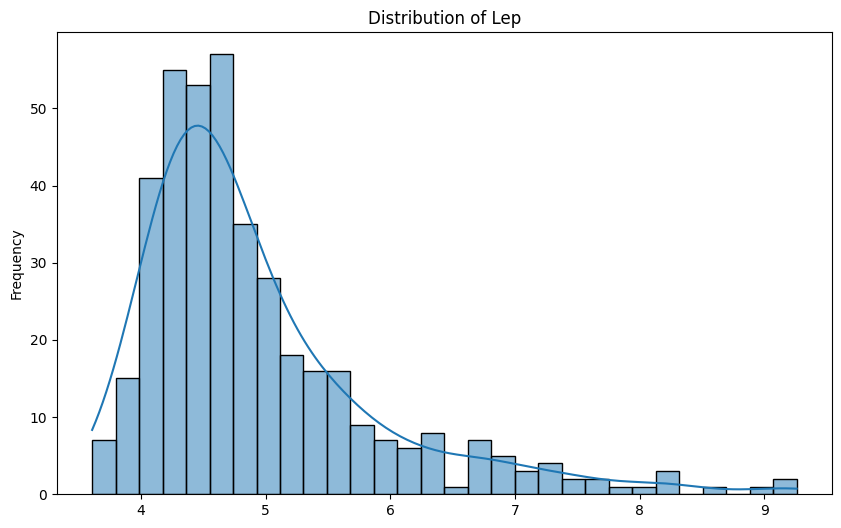

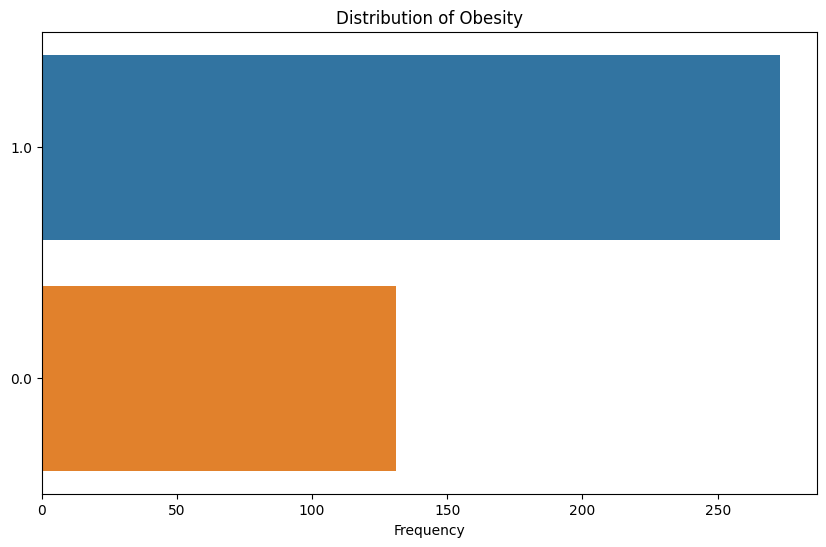

In [80]:
condition_feature_cols = condition_merged_data.columns.tolist()[:-1]
gene_list = [gene_regressors_for_condition[0]] # Only show one gene
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(condition_merged_data, numerical_columns=[ *gene_list], categorical_columns=[condition])

In [81]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [82]:
from sklearn.linear_model import LogisticRegression

def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Instantiate LogisticRegression with L1 regularization
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

        # Fit the logistic regression model on the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        binary_predictions = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

data_array_condition = condition_merged_data[gene_regressors_for_condition].values

# Normalize data
X_condition = data_array_condition
# print(X_condition.shape)

y_condition = condition_merged_data[condition].values
# print(y_condition.shape)
print(cross_validation(X_condition, y_condition))


0.6799999999999999


In [83]:
# Select relevant columns and convert to numpy array
print("Common gene regressors for condition and trait", gene_regressors_for_condition)
data_array_condition = condition_merged_data[gene_regressors_for_condition].values


# Normalize data
X_condition = data_array_condition
X_condition, _ = preprocess_data(X_condition)

y_condition = condition_merged_data[condition].values
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_condition, y_condition)
# Implementing k-fold cross-validation

Common gene regressors for condition and trait ['lep', 'pparg', 'pomc', 'enpp1', 'adcy3']


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [87]:
# Select relevant columns and convert to numpy array
data_array_common_regressors = trait_merged_data[gene_regressors_for_condition].values.astype(float)
#print(data_array_common_regressors)

X_common_regressors = data_array_common_regressors
X_common_regressors, _ = preprocess_data(X_common_regressors)

predictions_condition = model.predict_proba(X_common_regressors)[:, 1]

In [88]:

#Add the predicted condition to the gene data for trait
trait_merged_data.insert(0, condition, predictions_condition)
trait_merged_data = trait_merged_data.drop(columns=gene_regressors_for_condition)
trait_merged_data

,Obesity,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,adss,ercc2,acrbp /// ing4,eif2b1,ppl,bod1l,zmiz2,alg3,gapdh,Depression
GSM938860,0.712561,418.5,335.6,382.8,66.7,188.3,92.7,85.5,113.2,196.7,...,75.5,10.3,37.3,39.7,3.5,1.4,34.7,16.6,3332.5,"treatment: no shock, brain collected after 2hrs"
GSM938861,0.676316,317.8,446.4,221.4,40.4,159.3,87.5,90.7,81.4,240.3,...,75.5,7.7,15.3,62.3,2.6,0.9,56.1,17.5,3066.6,treatment: 1 shock and brain collected after 2hrs
GSM938862,0.653870,679.0,616.6,362.5,52.2,226.9,111.0,226.8,205.6,436.8,...,92.9,16.9,23.3,30.3,9.0,6.2,93.6,8.0,4645.4,treatment: 1 shock and brain collected after 6hrs
GSM938863,0.592329,622.3,806.0,311.4,49.1,148.4,157.2,150.7,203.1,281.4,...,104.3,19.7,21.6,106.0,16.2,13.6,49.9,20.8,4554.1,treatment: 7 shocks and brain collected after ...
GSM938864,0.729434,626.8,680.8,460.6,66.9,216.1,100.9,237.9,87.9,488.5,...,175.3,13.9,22.4,44.5,0.9,3.4,48.8,32.4,4454.0,treatment: 7 shocks and brain collected after ...


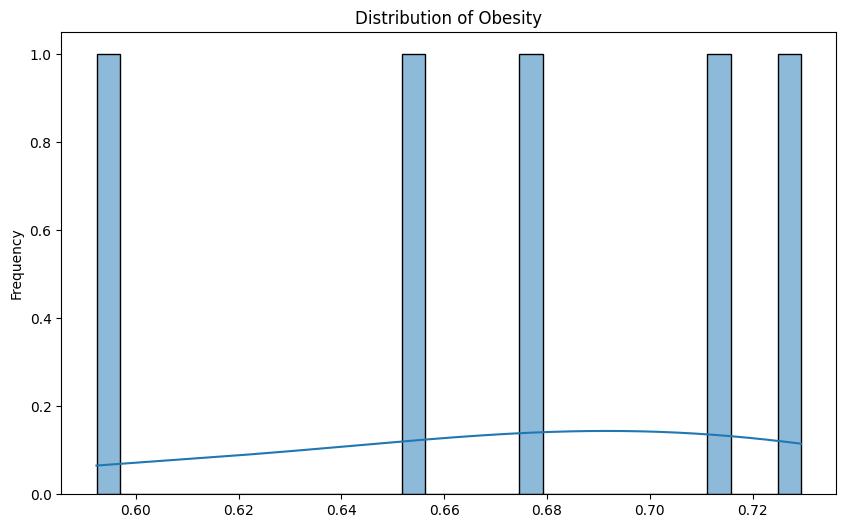

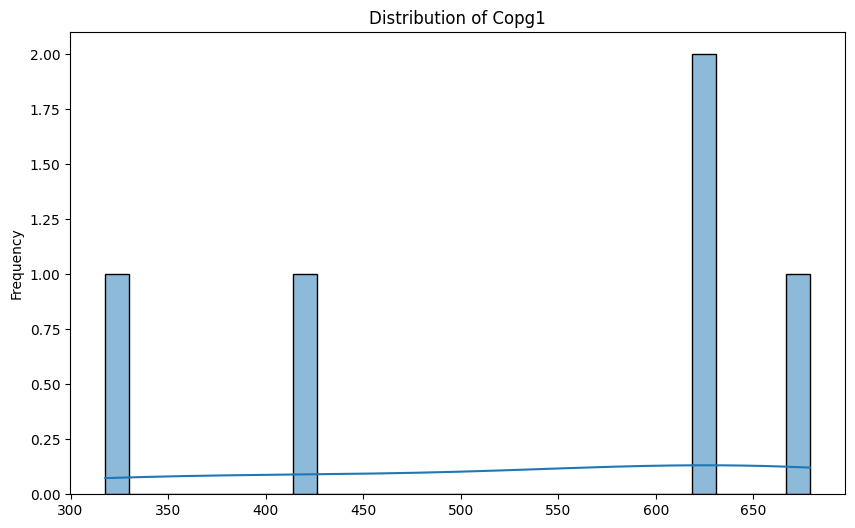

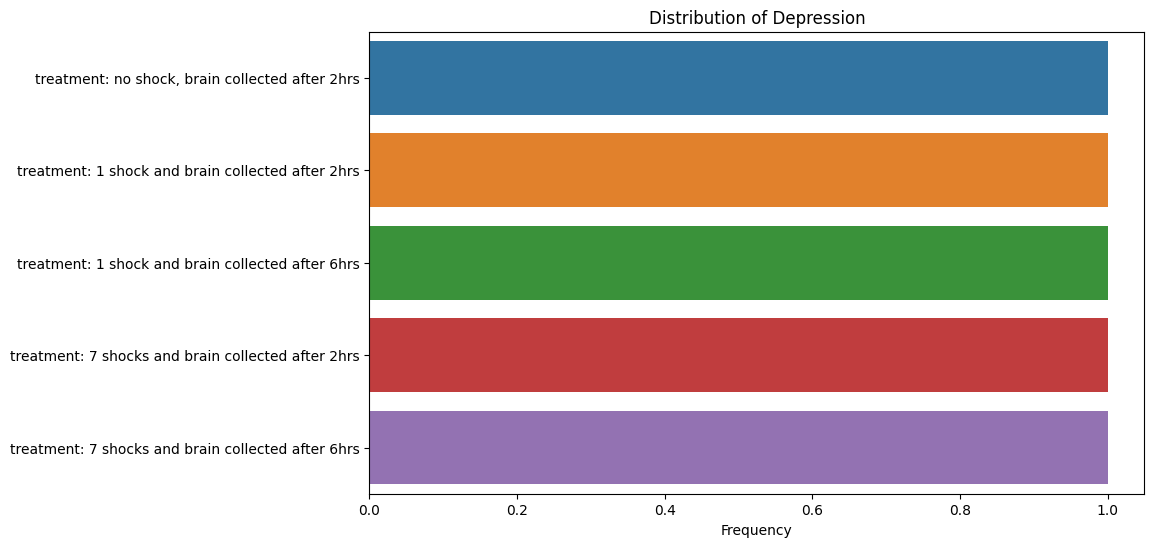

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
trait_feature_cols = trait_merged_data.columns.tolist()[:-1]
gene_list = [trait_feature_cols[1]] # [col for col in input_cols if gene in col.lower()]

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(trait_merged_data, numerical_columns=[condition,*gene_list], categorical_columns=[trait])

In [137]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection


# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []


    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)


# Select relevant columns and convert to numpy array
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
cv_mean, cv_std = cross_validation(X_trait, y_trait)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')



TypeError: ignored

In [106]:
trait_merged_data

,Obesity,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,adss,ercc2,acrbp /// ing4,eif2b1,ppl,bod1l,zmiz2,alg3,gapdh,Depression
GSM938860,0.712561,418.5,335.6,382.8,66.7,188.3,92.7,85.5,113.2,196.7,...,75.5,10.3,37.3,39.7,3.5,1.4,34.7,16.6,3332.5,"treatment: no shock, brain collected after 2hrs"
GSM938861,0.676316,317.8,446.4,221.4,40.4,159.3,87.5,90.7,81.4,240.3,...,75.5,7.7,15.3,62.3,2.6,0.9,56.1,17.5,3066.6,treatment: 1 shock and brain collected after 2hrs
GSM938862,0.653870,679.0,616.6,362.5,52.2,226.9,111.0,226.8,205.6,436.8,...,92.9,16.9,23.3,30.3,9.0,6.2,93.6,8.0,4645.4,treatment: 1 shock and brain collected after 6hrs
GSM938863,0.592329,622.3,806.0,311.4,49.1,148.4,157.2,150.7,203.1,281.4,...,104.3,19.7,21.6,106.0,16.2,13.6,49.9,20.8,4554.1,treatment: 7 shocks and brain collected after ...
GSM938864,0.729434,626.8,680.8,460.6,66.9,216.1,100.9,237.9,87.9,488.5,...,175.3,13.9,22.4,44.5,0.9,3.4,48.8,32.4,4454.0,treatment: 7 shocks and brain collected after ...


In [107]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

#X_trait = trait_merged_data.values
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
X_trait, _ = preprocess_data(X_trait)

# Fit the model
var_select.fit(X_trait, y_trait)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

TypeError: ignored

In [127]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': trait_feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


NameError: ignored

In [109]:
threshold = 0.4

# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")


NameError: ignored